In [5]:
import pickle
import seaborn as sns

import matplotlib.pyplot as plt

In [6]:
%run -i 0_functions.py

# 1. Read Data

In [ ]:
all_subsets = []
division = 5
for i in [1, 2, 3]:
    for j in range(division):
        dataset = read_with_pc(f"data/rep{i}_mono_subset{j}.h5ad")
        print(dataset.n_obs)
        all_subsets.append(dataset)

for i in [1, 2, 3]:
    for j in range(division):
        dataset = read_with_pc(f"data/rep{i}_ery_subset{j}.h5ad")
        print(dataset.n_obs)
        all_subsets.append(dataset)


In [3]:
all_subsets_hvg = []
division = 5
for i in [1, 2, 3]:
    for j in range(division):
        dataset = read_with_pc(f"data/rep{i}_mono_subset{j}_hvg.h5ad")
        print(dataset.n_obs)
        all_subsets_hvg.append(dataset)

for i in [1, 2, 3]:
    for j in range(division):
        dataset = read_with_pc(f"data/rep{i}_ery_subset{j}_hvg.h5ad")
        print(dataset.n_obs)
        all_subsets_hvg.append(dataset)


744
744
744
744
744
758
758
758
758
758
1386
1386
1386
1386
1386
422
422
422
422
422
640
640
640
640
640
558
558
558
558
558


# 2. Run dynchro

In [4]:
from tqdm.notebook import tqdm

def run_dynchro(datasets, unique = False):
    results = [[0 for i in range(len(datasets))] for j in range(len(datasets))]

    for i1 in tqdm(range(len(datasets))):
        for j1 in tqdm(range(i1+1, len(datasets)), leave = False):
            # print(f"{i1} {j1}")
            d1 = datasets[i1]
            d2 = datasets[j1]

            if unique:
                # select unique var ids
                obs_ids = list(set(d1.obs_names) ^ set(d2.obs_names))
                d1_mask = d1.obs_names.isin(obs_ids) 
                d2_mask = d2.obs_names.isin(obs_ids)

                d1 = d1[d1_mask, :]
                d2 = d2[d2_mask, :]

            res = dynchro_wrapper(d1, d2)
            results[i1][j1] = res
            # fill it in the other triangle
            results[j1][i1] = res

    return results

In [ ]:
results_all_subsets = run_dynchro(all_subsets)

In [ ]:
pickle.dump(results_all_subsets, open("data/results_dynchro_all_genes_subsets.pkl", "wb"))

In [5]:
results_all_hvg = run_dynchro(all_subsets_hvg)

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

In [13]:
pickle.dump(results_all_hvg, open("data/results_dynchro_hvg_subsets.pkl", "wb"))

In [14]:
results_no_dup_hvg = run_dynchro(all_subsets_hvg, unique = True)

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

In [15]:
pickle.dump(results_no_dup_hvg, open("data/results_dynchro_hvg_subsets_no_dup_norm2.pkl", "wb"))

# 3. Visualisations

In [7]:
all_labels = ["rep1_sub1_mono", "rep1_sub2_mono", "rep1_sub3_mono", "rep1_sub4_mono", "rep1_sub5_mono", "rep2_sub1_mono", "rep2_sub2_mono", "rep2_sub3_mono", "rep2_sub4_mono", "rep2_sub5_mono", "rep3_sub1_mono", "rep3_sub2_mono", "rep3_sub3_mono", "rep3_sub4_mono", "rep3_sub5_mono", "rep1_sub1_ery", "rep1_sub2_ery", "rep1_sub3_ery", "rep1_sub4_ery", "rep1_sub5_ery", "rep2_sub1_ery", "rep2_sub2_ery", "rep2_sub3_ery", "rep2_sub4_ery", "rep2_sub5_ery", "rep3_sub1_ery", "rep3_sub2_ery", "rep3_sub3_ery", "rep3_sub4_ery", "rep3_sub5_ery"]

In [19]:
results_all_subsets = pickle.load(open("data/results_dynchro_hvg_subsets_no_dup_norm2.pkl", "rb"))

In [9]:
results_all_subsets = results_no_dup_hvg

NameError: name 'results_no_dup_hvg' is not defined

In [32]:
results_all_subsets[0]

[0,

In [20]:
dist = [[res[0].dist() if not isinstance(res, int) else 0 for res in res1] for res1 in results_all_subsets]
dist_norm = [[res[0].dist_norm() if not isinstance(res, int) else 0 for res in res1] for res1 in results_all_subsets]
dist_norm_path = [[res[0].dist_norm_path() if not isinstance(res, int) else 0 for res in res1] for res1 in results_all_subsets]
dist_norm_orig = [[res[0].dist() / (sum(len(x) for x in res[0].path1().values())) if not isinstance(res, int) else 0 for res in res1] for res1 in results_all_subsets]

In [21]:
dist_norm

[[0,
  np.float64(33.79922960214296),
  np.float64(33.8544278903686),
  np.float64(33.76739317134391),
  np.float64(33.81778617410827),
  np.float64(33.45429063658589),
  np.float64(33.67106766988404),
  np.float64(33.59328532290097),
  np.float64(33.39421004382735),
  np.float64(33.54789925583006),
  np.float64(41.18645462524919),
  np.float64(41.164024093406184),
  np.float64(41.15542342065869),
  np.float64(41.14374769236669),
  np.float64(41.18728539379128),
  np.float64(42.97850473846717),
  np.float64(43.32430940807159),
  np.float64(43.17011928237306),
  np.float64(42.885467471888546),
  np.float64(43.37568819458354),
  np.float64(35.92644117304435),
  np.float64(35.96087678561546),
  np.float64(36.09218257300384),
  np.float64(36.0134625045083),
  np.float64(36.081076239256745),
  np.float64(38.05534633921807),
  np.float64(38.00751034329583),
  np.float64(38.12200190479592),
  np.float64(38.00601983997903),
  np.float64(37.84160139625698)],
 [np.float64(33.79922960214296),
  0

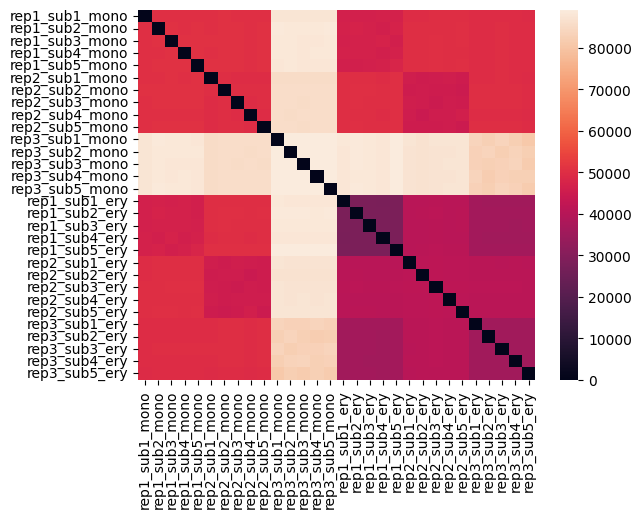

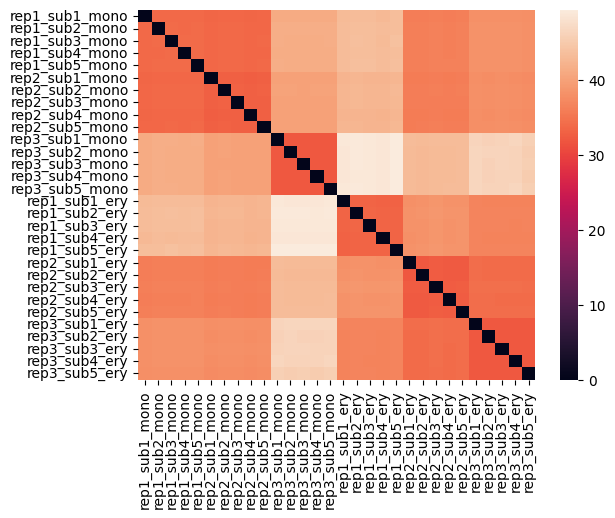

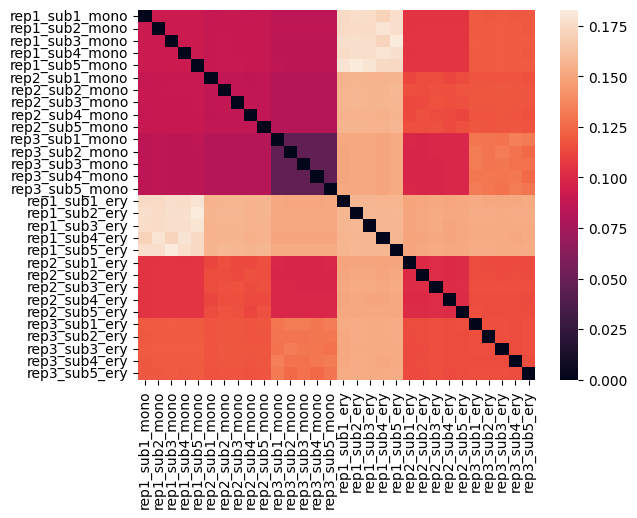

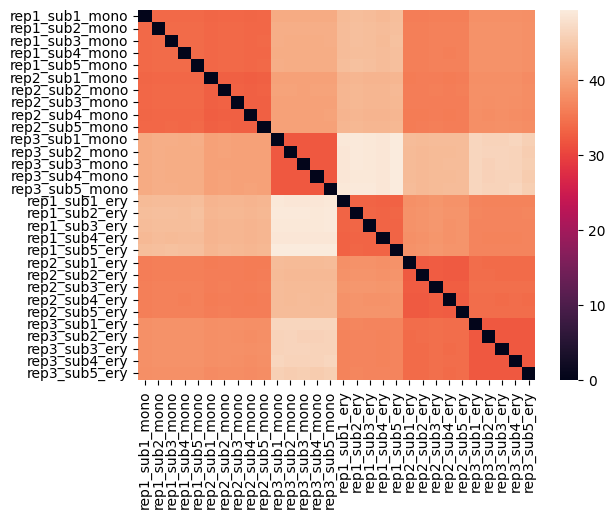

In [23]:
sns.heatmap(dist, xticklabels=all_labels, yticklabels=all_labels)
plt.show()
sns.heatmap(dist_norm, xticklabels=all_labels, yticklabels=all_labels)
plt.show()
sns.heatmap(dist_norm_path, xticklabels=all_labels, yticklabels=all_labels)
plt.show()
sns.heatmap(dist_norm_orig, xticklabels=all_labels, yticklabels=all_labels)
plt.show()

TypeError: float() argument must be a string or a real number, not 'collections.defaultdict'

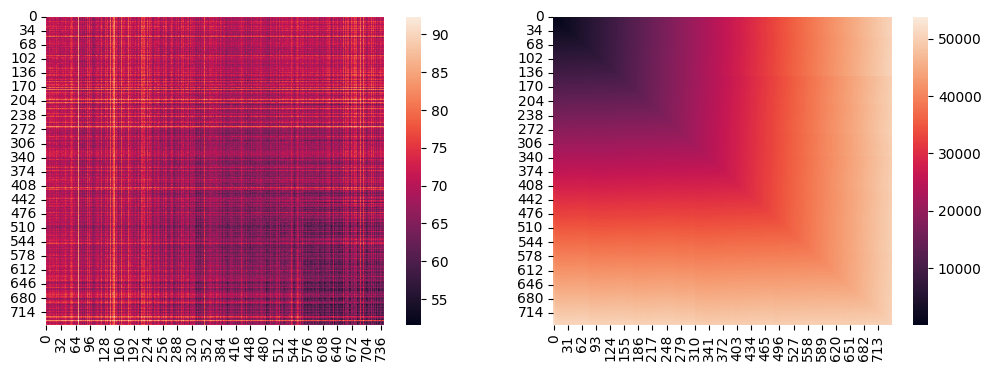

In [20]:
results_all_subsets[0][1][0].plot_cost_distances()

TypeError: float() argument must be a string or a real number, not 'collections.defaultdict'

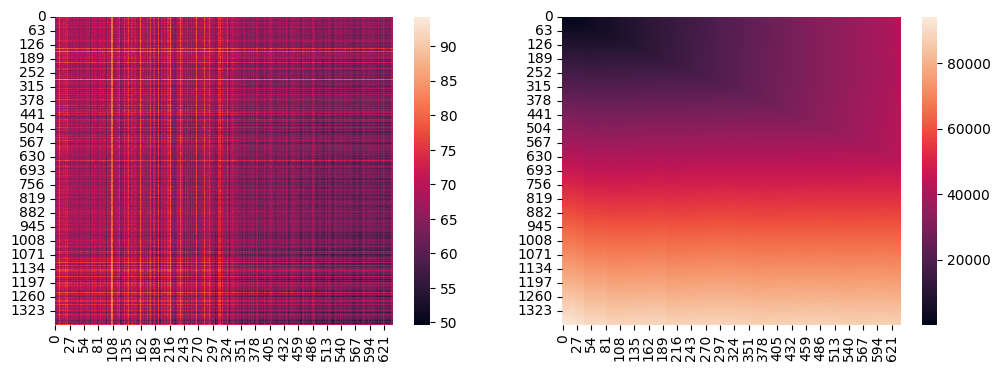

In [21]:
results_all_subsets[10][23][0].plot_cost_distances()

TypeError: float() argument must be a string or a real number, not 'collections.defaultdict'

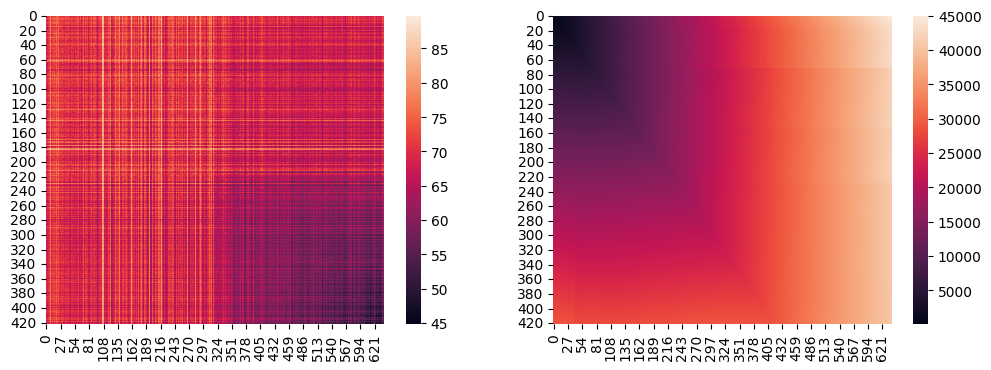

In [22]:
results_all_subsets[15][23][0].plot_cost_distances()

In [23]:
results_all_subsets[15][23][0]._lin2

'Ery'